In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6


In [6]:
dataset = pd.read_csv('Airpassengers.csv')
# parse strings to datetime type

dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format = True)
IndexedDataset =  dataset.set_index(['Month'])

In [7]:
from datetime import datetime
IndexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


C:\Users\mayur\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


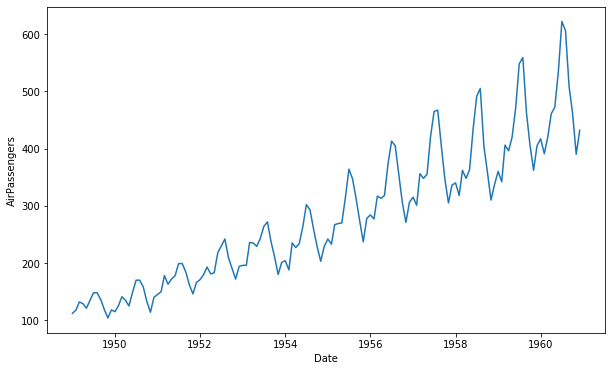

In [8]:
# plot a graph

plt.xlabel("Date")
plt.ylabel('AirPassengers')
plt.plot(IndexedDataset)

In [9]:
## Determining Rolling statestics

rolmean = IndexedDataset.rolling(window = 12).mean()
rolstd = IndexedDataset.rolling(window = 12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

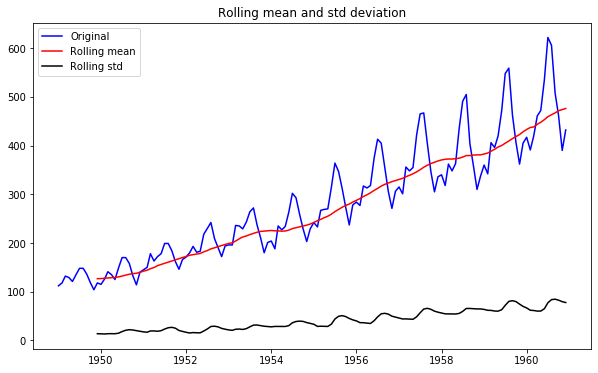

In [12]:
## plotting rolling statestics

orig = plt.plot(IndexedDataset, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling mean and std deviation')
plt.show(block = False)

In [27]:
# from rolling statestics we can conclude that data is non stationary
# Dickey - Fuller test:

from statsmodels.tsa.stattools import adfuller

print('Results of dickey fuller test:')
dftest = adfuller(IndexedDataset['#Passengers'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test statistics','p-values','#Lags used','Number of observation used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)' %key] = value

print(dfoutput)




Results of dickey fuller test:
Test statistics                 0.815369
p-values                        0.991880
#Lags used                     13.000000
Number of observation used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


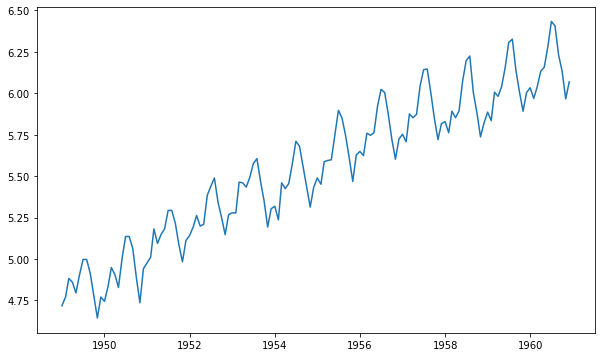

In [19]:
# Estimating trend
IndexedDataset_logScale = np.log(IndexedDataset)
plt.plot(IndexedDataset_logScale)

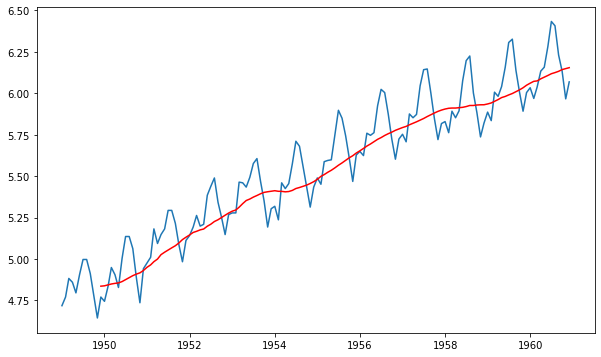

In [22]:
movingAverage = IndexedDataset_logScale.rolling(window = 12).mean()
movingSTD     = IndexedDataset_logScale.rolling(window = 12).std()
plt.plot(IndexedDataset_logScale)
plt.plot(movingAverage, color = 'red')
         

In [25]:
differ = IndexedDataset_logScale - movingAverage
differ.head(12)

# remove Nan values
differ.dropna(inplace = True)
differ.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [29]:
def test_stationary(timeseries):
    
    # define rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingstd     = timeseries.rolling(window = 12).std()
    
    # plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling mean')
    std = plt.plot(movingstd, color = 'black', label = 'Rolling std')
    plt.legend(loc = 'best')
    plt.title('Rolling mean and std deviation')
    plt.show(block = False)
    
    # perform dickey - fuller test
    print('Results of dickey fuller test:')
    dftest = adfuller(timeseries['#Passengers'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test statistics','p-values','#Lags used','Number of observation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value

    print(dfoutput)
    

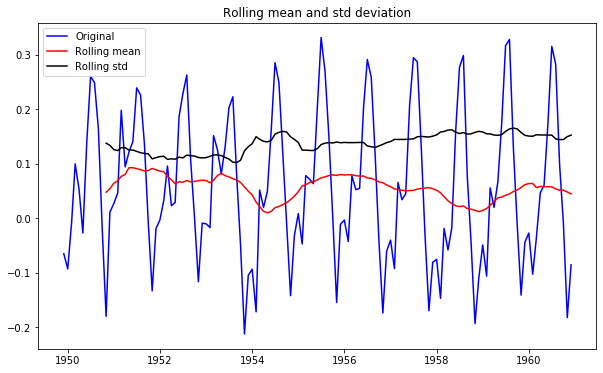

Results of dickey fuller test:
Test statistics                -3.162908
p-values                        0.022235
#Lags used                     13.000000
Number of observation used    119.000000
Critical value (1%)            -3.486535
Critical value (5%)            -2.886151
Critical value (10%)           -2.579896
dtype: float64


In [30]:
test_stationary(differ)

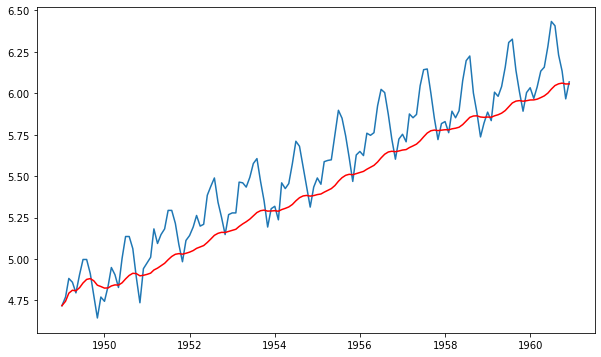

In [31]:
WeightedAVG = IndexedDataset_logScale.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(IndexedDataset_logScale)
plt.plot(WeightedAVG, color = 'red')

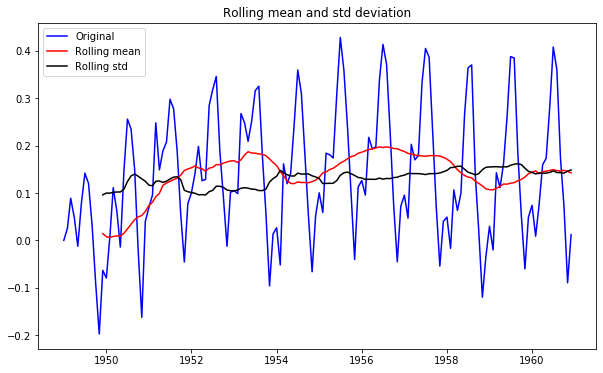

Results of dickey fuller test:
Test statistics                -3.601262
p-values                        0.005737
#Lags used                     13.000000
Number of observation used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [32]:
diff = IndexedDataset_logScale - WeightedAVG
test_stationary(diff)


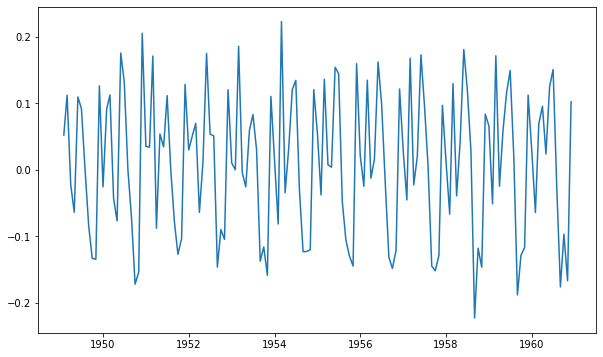

In [33]:
log_shift = IndexedDataset_logScale - IndexedDataset_logScale.shift()
plt.plot(log_shift)

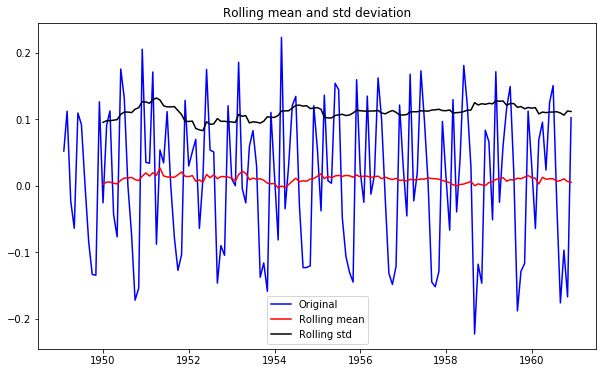

Results of dickey fuller test:
Test statistics                -2.717131
p-values                        0.071121
#Lags used                     14.000000
Number of observation used    128.000000
Critical value (1%)            -3.482501
Critical value (5%)            -2.884398
Critical value (10%)           -2.578960
dtype: float64


In [34]:
log_shift.dropna(inplace = True)
test_stationary(log_shift)

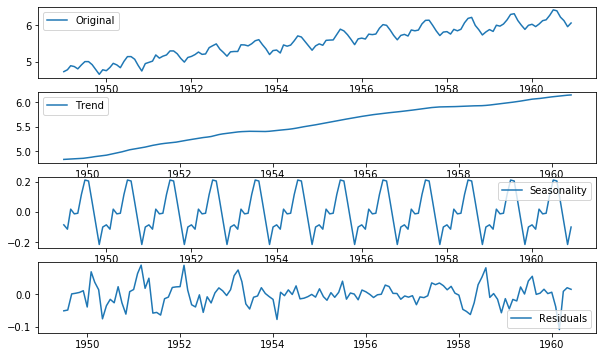

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(IndexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(IndexedDataset_logScale, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc ='best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend( loc = 'best')





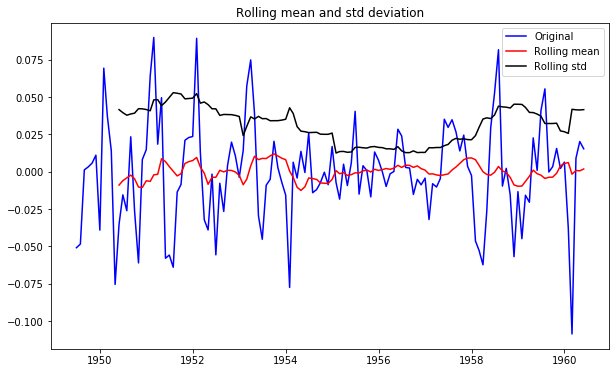

Results of dickey fuller test:
Test statistics              -6.332387e+00
p-values                      2.885059e-08
#Lags used                    9.000000e+00
Number of observation used    1.220000e+02
Critical value (1%)          -3.485122e+00
Critical value (5%)          -2.885538e+00
Critical value (10%)         -2.579569e+00
dtype: float64


In [39]:
decomposedLogdata = residual
decomposedLogdata.dropna(inplace = True)
test_stationary(decomposedLogdata)

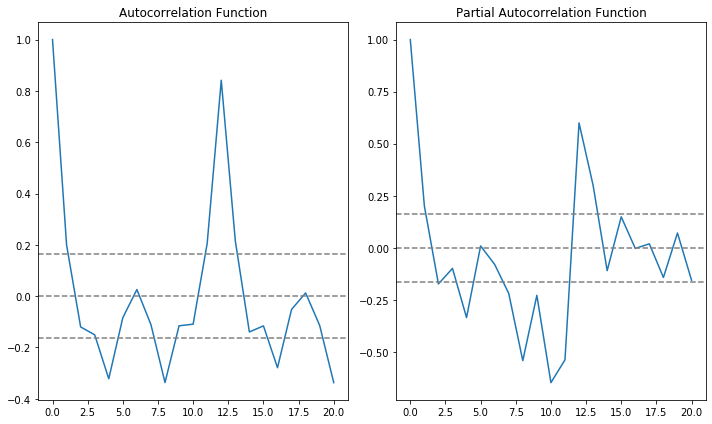

In [42]:
## ACF and PACF plots:

from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(log_shift, nlags= 20)
lag_pacf = pacf(log_shift, nlags= 20, method = 'ols')

# plot ACF 

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = '--' , color = 'grey')
plt.axhline(y = -1.96 / np.sqrt(len(log_shift)), linestyle = '--' , color = 'grey')
plt.axhline(y = 1.96 / np.sqrt(len(log_shift)), linestyle = '--' , color = 'grey')
plt.title('Autocorrelation Function')


# plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline( y = 0, linestyle = '--' , color = 'grey')
plt.axhline(y = -1.96 / np.sqrt(len(log_shift)), linestyle = '--' , color = 'grey')
plt.axhline(y = 1.96 / np.sqrt(len(log_shift)), linestyle = '--' , color = 'grey')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()



Plotting AR model


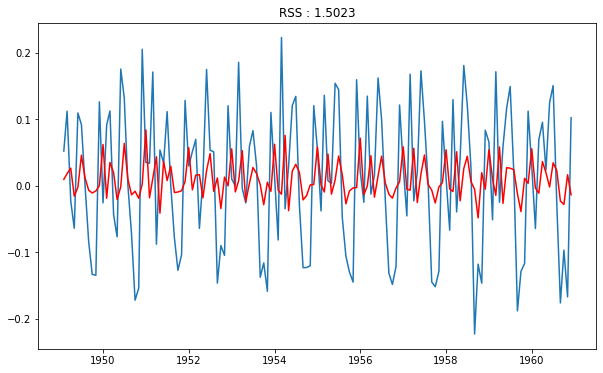

In [44]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model

model = ARIMA(IndexedDataset_logScale , order = (2,1,0))
results_AR = model.fit(disp = 1)
plt.plot(log_shift)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS : %0.4f' %sum((results_AR.fittedvalues - log_shift["#Passengers"]) **2))
print('Plotting AR model')

Plotting MA model


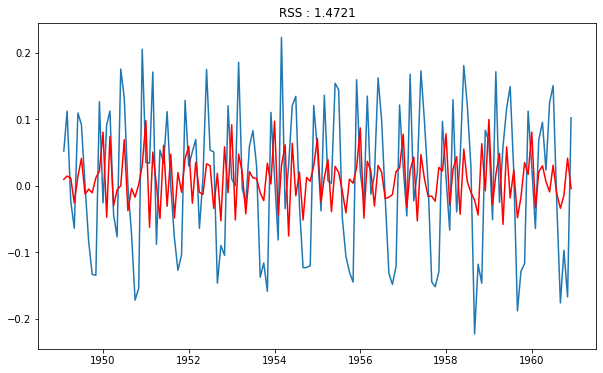

In [45]:
# MA Model

model = ARIMA(IndexedDataset_logScale , order = (0,1,2))
results_MA = model.fit(disp = 1)
plt.plot(log_shift)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS : %0.4f' %sum((results_MA.fittedvalues - log_shift["#Passengers"]) **2))
print('Plotting MA model')

Plotting ARIMA model


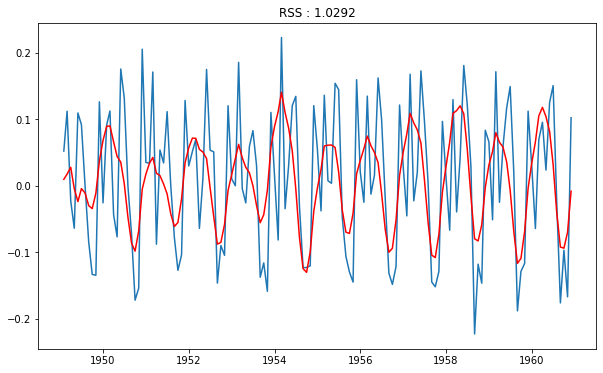

In [46]:
# ARIMA Model

model = ARIMA(IndexedDataset_logScale , order = (2,1,2))
results_ARIMA = model.fit(disp = 1)
plt.plot(log_shift)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS : %0.4f' %sum((results_ARIMA.fittedvalues - log_shift["#Passengers"]) **2))
print('Plotting ARIMA model')

In [59]:
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [60]:
#Convert to cumulative sum
predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()
print(predictions_ARIMA_cumsum.head(5))


Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [61]:
predictions_ARIMA_log = pd.Series(IndexedDataset_logScale['#Passengers'].ix[0] , index = IndexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

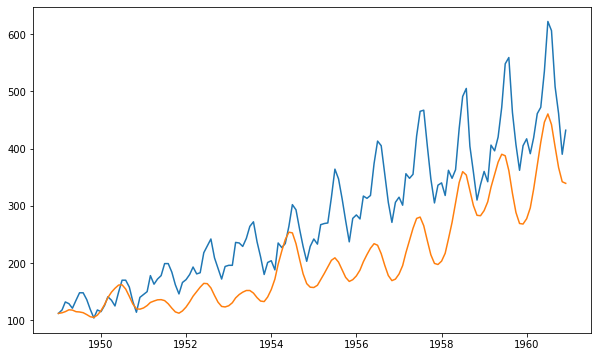

In [62]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(IndexedDataset)
plt.plot(predictions_ARIMA)

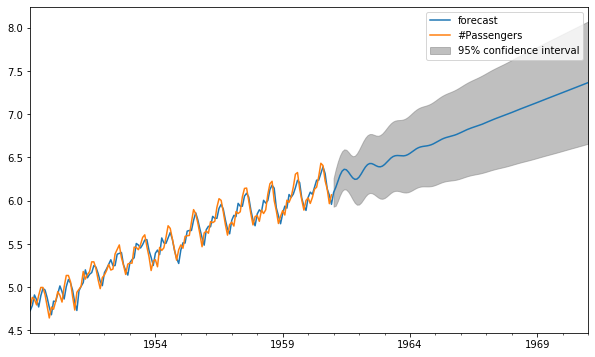

In [63]:
results_ARIMA.plot_predict(1,264)


In [64]:
results_ARIMA.forecast(120)

(array([6.09553391, 6.15281403, 6.2244297 , 6.29241111, 6.3416473 ,
        6.36359377, 6.35784699, 6.33139313, 6.29597544, 6.26447712,
        6.2473832 , 6.25025165, 6.27275832, 6.30940312, 6.35151498,
        6.38988664, 6.41727392, 6.43011064, 6.42906696, 6.4184249 ,
        6.40456151, 6.39403607, 6.39183072, 6.40019494, 6.41833686,
        6.44295406, 6.46937438, 6.49293991, 6.51024124, 6.51989037,
        6.52267578, 6.52112382, 6.51864518, 6.51853678, 6.5231191 ,
        6.5332235 , 6.54812862, 6.56591553, 6.58410307, 6.60036539,
        6.61313265, 6.62192778, 6.62737782, 6.63093119, 6.63438676,
        6.63937971, 6.64696491, 6.65739828, 6.67015315, 6.68414243,
        6.6980662 , 6.71077894, 6.72157725, 6.73033974, 6.73749799,
        6.74386365, 6.75037307, 6.75782576, 6.76668666, 6.77699808,
        6.78841306, 6.80032841, 6.81207183, 6.82308748, 6.83307123,
        6.84202478, 6.85022296, 6.85811203, 6.86617322, 6.87479132,
        6.88416284, 6.89426366, 6.90487872, 6.91